# Workshop n°1

*Links : https://www.tensorflow.org/tutorials/quickstart/beginner & https://www.tensorflow.org/tutorials/keras/classification*

This notebook uses TensorFlow and the Keras API to create an image classification model on the Fashion MNIST dataset, which contains images of clothing.

This Fashion MNIST dataset contains 70,000 images, in grayscale, divided into 10 categories, and showing individual clothes at low resolution (28x28 pixels):

![image.png](https://cdn.discordapp.com/attachments/822939064537317376/1288228021215428720/fashion-mnist-sprite.png?ex=66f46b56&is=66f319d6&hm=8a099e284e6086744f4350b4f3fc4ed6bcda75970d02f786a73d768192214c5f&)

## Import of libraries

In [236]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# sklearn
from sklearn.model_selection import train_test_split

# TensorBoard
import tensorflow as tf


## Tensor Board

Create a log directory: Choose a directory where TensorBoard will store its logs.



In [237]:
log_dir = "logs/fit/"  # This is where TensorBoard will store logs


Set up TensorBoard callback: Use the TensorBoard callback to log data during the model's training. The callback is added to the model.fit() function.

In [238]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


### TensorFlow

**TensorFlow** is an open-source machine learning framework that allows developers to build and train machine learning models, especially neural networks. Its name breaks down into two parts: **Tensor** and **Flow**.

A **tensor** is a mathematical object that is a generalization of scalars, vectors, and more :
  - **Scalars** are 0-dimensional tensors (e.g., a single number).
  - **Vectors** are 1-dimensional tensors (e.g., an array of numbers).
  - **Matrices** are 2-dimensional tensors (e.g., a table of numbers).
  - **Higher-dimensional tensors** (3D, 4D, etc.) can represent more complex data structures (e.g., images, videos, or batches of data).
Tensors are the primary data structure used in TensorFlow, enabling efficient computation and manipulation of data for machine learning tasks.

**Flow** refers to the way data moves through a computational graph. In TensorFlow, operations (or computations) are represented as nodes in a graph, and tensors flow between these nodes. This design allows:
  - **Efficient computation**: TensorFlow can optimize the computation process and distribute it across various devices (like CPUs and GPUs).
  - **Modular construction**: You can build complex models by chaining together simple operations in a structured manner.
  - **Automatic differentiation**: TensorFlow can automatically compute gradients, which is essential for training machine learning models through backpropagation.

**Summary** :
TensorFlow is a framework that allows for the manipulation and computation of tensors within a flow of operations, making it powerful for machine learning, particularly deep learning applications. It is designed to **scale** across various platforms, from mobile devices to large-scale distributed systems. TensorFlow also has a rich ecosystem that includes TensorBoard (for visualization), TensorFlow Lite (for mobile and embedded devices), and TensorFlow Serving (for deploying models).

### Keras
Keras is an open-source deep learning library designed to simplify the process of building and training neural networks. It provides a user-friendly interface, allowing developers to quickly prototype and experiment with deep learning models without needing to dive deep into the technical complexities. Initially, Keras was built to work with multiple backend engines, such as TensorFlow and Theano, but with the release of TensorFlow 2.0, it became an integral part of TensorFlow and is now primarily used as its high-level API.


## Import of the Dataset

We load our dataset, divided into 2 sets, with the function '*load_data*', which is unfortunately not parameterizable...

Each image (table NumPy 28x28, with pixel values ranging from 0 to 255) is associated with a single label (each corresponding to an integer, ranging from 0 to 9), corresponding to its class of clothing. They are given a 'class name' for ease.

In [239]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**NB :** To be able to configure our test sets, we can use '*train_test_split*' from sklearn.

In [240]:
# Combine training and test sets
all_images = np.concatenate((train_images, test_images))
all_labels = np.concatenate((train_labels, test_labels))

# Divide data into training, validation and test sets
train_images, temp_images, train_labels, temp_labels = train_test_split(
    all_images, all_labels, test_size=0.4, random_state=42)  # 60% training

val_images, test_images, val_labels, test_labels = train_test_split(
    temp_images, temp_labels, test_size=0.5, random_state=42)  # 20% validation, 20% test

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Data Exploration

In [241]:
# Train Set
print("Train Shape",train_images.shape)             # 60 000 images, 28x28 pixels
print("Lenght Train labels:",len(train_labels))     # 60 000 labels (integer between 0 and 9) 
# test Set
print("Test Shape:",test_images.shape)              # 10 000 images, 28x28 pixels
print("Lenght Test labels",len(test_labels))        # 10 000 labels (integer between 0 and 9)

Train Shape (42000, 28, 28)
Lenght Train labels: 42000
Test Shape: (14000, 28, 28)
Lenght Test labels 14000


## Data Preprocessing

Data must be pre-processed before forming the network.

For example, if you look at the first image of the learning set, you can see that the pixel values are between 0 and 255 (corresponding to its color).

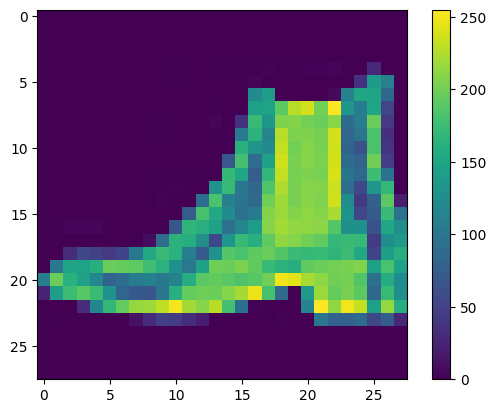

In [242]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

We normalize images by dividing pixel values by 255 to a range of 0 to 1.

It is important that the learning set and test set are pre-processed **same way**:

In [243]:
train_images = train_images / 255.0
test_images = test_images / 255.0

To verify that the data is in the correct format and ready to build and train the network, we display the first 25 images of the learning set and the class name under each image.

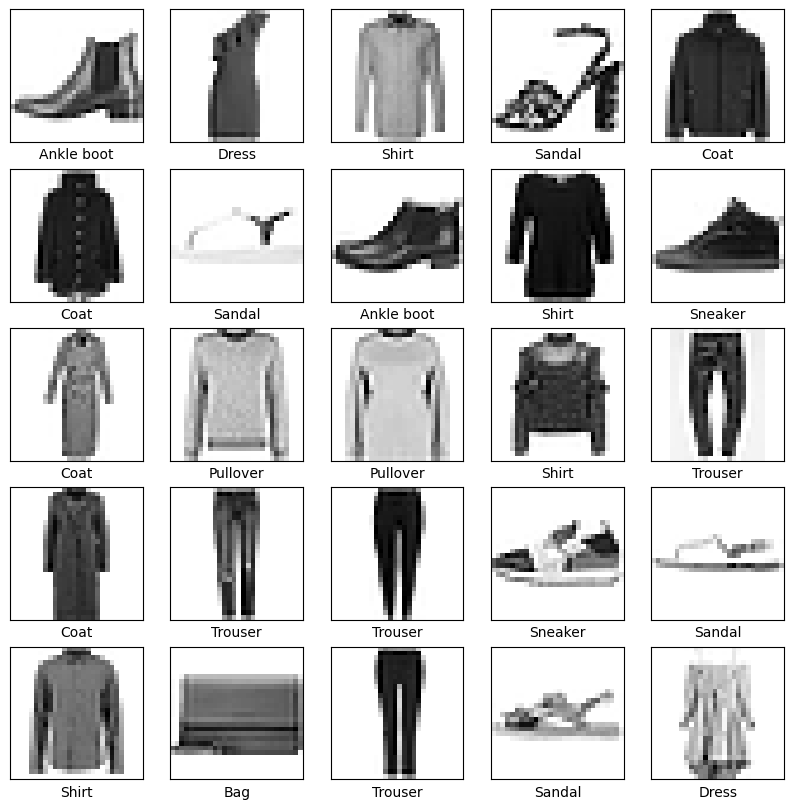

In [244]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Model Building
The basic building block of a neural network is the **layer**. Layers extract representations of the data that are introduced into them.

The essence of deep learning is to chain simple layers. Most layers, such as '*tf.keras.layers.Dense*', have parameters learned during training.

Here, we build a sequential model with one flattening layer and 2 'dense' layers (the second is our output layer).

In [245]:
# First Layer 'Flatten': transform a multidimensional tensor (our images, in 2D) into a unidimensional vector (1D)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
])

Fashion MNIST images are represented as 28x28 pixels tables, but dense layers (fully connected layers) are waiting for input in the form of vectors. The 'Flatten' layer therefore flattens each image into a vector of 784 pixels (28*28=784).

In [246]:
# Second Layer 'Dense': a densely connected, or fully connected, neural layers of 128 nodes/neurons
model.add(tf.keras.layers.Dense(128, activation='relu')) 

The ReLU (Rectified Linear Unit) activation function is applied, which transforms the output of the layer into max(0, x). This introduce non-linearity into the model and allows to learn complex patterns better. This layer learns representations from flattened input data.

In [247]:
# Our Regularization Method : Dropout
model.add(tf.keras.layers.Dropout(0.2))

In [248]:
# Third Layer 'Dense' : returns a logits array with length of 10. 
model.add(tf.keras.layers.Dense(10)) 

Each of the 10 nodes output contains a score that indicates the current image belongs to one of the 10 classes.

In [249]:
# To Sum Up
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Compilation of the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:
- Optimizer : This is how the model is updated based on the data it sees and its loss function.
- Loss function : This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Metrics : Used to monitor the training and testing steps. 

For the rest of the workshop, we will use the **Accuracy** metric, the fraction of the images that are correctly classified.

### Choosing our Optimizer
    An optimizer is an algorithm or method used to update the weights and biases of a machine learning model in order to minimize the loss function. The loss function measures how far the predictions of a model deviate from the actual values. In other words, the optimizer guides the learning process by adjusting the model’s parameters to improve its performance.

| Optimizer                | Description                                                                                  | Benefits                                                                                     | Drawbacks                                                   | Fonction                                       |
|--------------------------|----------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------|---------------------------------------------------------------|--------------------------------------------------|
| **SGD** (Stochastic Gradient Descent) | A basic optimizer that updates weights in small batches. | Simple to understand and implement, good performance on well-defined problems. | May be slow to converge, sensitive to learning rate selection. | Linear regression, simple networks.           |
| **Momentum** | Improves SGD by adding "memory" of past gradients to speed up convergence.  | Helps to cross "narrow valleys", reduces oscillations. | May require setting of hyperparameters. | Deep neural networks, SGD optimization.|
| **Nesterov Momentum** | Momentum variant that calculates the gradient at the anticipated position.| Faster than the classic Momentum.  | May require setting of hyperparameters. | Similar issues to Momentum. |
| **AdaGrad** | Adapts the learning rate for each parameter based on the historical gradients. | Effective for rare data, automatically adjusts the learning rate. | May lead to very low learning rates. | NLP (Natural Language Processing) models, sparse neural networks. |
| **RMSProp** | An AdaGrad enhancement that uses an adaptive learning rate based on the average of recent gradients. | Very effective for neural network problems, handles oscillations well. | May require setting of hyperparameters. | Deep neural networks, non-stationary problems. |
| **Adam** | Combines the benefits of Momentum and AdaGrad. | Fast convergence, generally good without much adjustment. | May be sensitive to learning rate settings. | Commonly used for most ML problems. |
| **AdamW** | Adam’s variant which applies a regularization weight in a different way. | Improves regularization and generalization. | More complex than the classic Adam. | Models with overfitting, deep applications. |
| **Nadam** | Combine Adam and Nesterov Momentum. | Benefits from both methods.  | More heavy calculating than Adam.  | Similar problems to those of Adam. |
| **FTRL** (Follow The Regularized Leader.)  |  Used for large data sets and online processing. | Effective for large-scale problems. | May be complex to configure.  | Online models, large problems.  |
| **AdaDelta**  | An AdaGrad enhancement that does not require a learning rate.  | Automatic, without learning rate adjustment.  | More complex than other methods.  | Varied problems, deep patterns.  |


For the rest of the workshop, we will choose to take the **"Adam" Optimizer** which is the most common for machine learning problems.

***NB** : this does not mean that it is the most optimal, we could use another one.*

### Choosing our Loss Fonction 
    A Loss Function (or Cost Function) is a criterion that measures how far the predictions of a machine learning model deviate from actual values. It quantifies the error between the outputs predicted by the model and the real labels. The goal of learning is to minimize this function of loss during training.

| Loss Fonction                                  | Description                                                                             | Usage                         | Benefits                                         | Drawbacks                                  |
|---------------------------------------------------|-----------------------------------------------------------------------------------------|-------------------------------------|---------------------------------------------------|------------------------------------------------|
| **Sparse Categorical Crossentropy**   | Used for multi-class classification problems with whole labels (each class in a multi-class classification is associated with an integer number.) | Multi-class classification   | Handles unbalanced classes well.   | Requires full labels.   |
| **Categorical Crossentropy**   | Used for multi-class classification problems with one-hot labels. | Multi-class classification   | Handles unbalanced classes well.   | Requires one-hot tags.   |
| **Binary Crossentropy**   | Used for binary classification problems.   | Binary classification   | Simple to understand and implement.   | Not suitable for multi-class problems.   |
| **Mean Squared Error (MSE)**   | Used for regression problems.   | Regression   | Simple and intuitive.   | Sensitive to outliers.   |
| **Mean Absolute Error (MAE)**   | Used for regression problems.   | Regression   | Less sensitive to outliers than MSE.   | May be less effective for some problems. |
| **Huber Loss**   | Combines the benefits of MSE and MAE.   | Regression   | Robust against outliers.   | Requires adjustment of the delta parameter.   |
| **Kullback-Leibler Divergence**   | Measures the divergence between two probability distributions.   | Probabilistic models   | Useful for generative models.   | Complex to interpret.   |
| **Poisson**   | Used for regression problems where targets are counts.   | Regression (counting data)   | Suitable for models that predict discrete events. | Not suitable for non-positive values.   |


Loss functions play a crucial role in learning machine learning models. The choice of the loss function should be based on the nature of the problem we are trying to solve. Using the right loss function can greatly improve our model’s performance.

For the rest of the workshop, it will be recommended to use **"Sparse Categorical Crossentropy"** for the loss function, because we have whole labels. 

In [250]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Model Training

Training the neural network model requires the following steps:
1) Feed the training data to the model. 
2) The model learns to associate images and labels.
3) We ask the model to make predictions about a test set.
4) Verify that the predictions match the labels from the test labels.

Here, we will train the model on training data for 10 times or 10 "**epochs**".    

    An epoch represents a complete iteration where the model has been trained on all available training data. At each time, the model adjusts its weights based on the gradients calculated from the errors in the training data.

**Why are epochs important ?**
- **Progressive Learning** : Each epoch allows the model to adjust more and more to the data, by learning the underlying characteristics.
- **Over-fitting** : In general, the more times there are, the more the model can learn. However, too many times can lead to over-adjustment, where the model learns training data too well but fails to generalize on new data.
- **Performance Assessment** : By monitoring the loss and accuracy at each time, you can assess if the model is improving and decide whether to stop training.

**Summary** : these are iterations in the training of the model that can and must be correctly defined to avoid problems and increase the overall performance.

### Open a terminal and run the following command to test Tensor Board

tensorboard --logdir=logs/fit

In [251]:
# Feeding the model with TensorBoard logging
model.fit(train_images, train_labels, epochs=10, callbacks=[tensorboard_callback])


Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7458 - loss: 0.7344
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8436 - loss: 0.4336
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8576 - loss: 0.3916
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8629 - loss: 0.3683
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8710 - loss: 0.3464
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8755 - loss: 0.3384
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8820 - loss: 0.3136
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8820 - loss: 0.3145
Epoch 9/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8879 - loss: 0.3055
Epoch 10/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8895 - loss: 0.2941



    In deep learning, batches refer to dividing the dataset into smaller groups of samples that are processed together before updating the model’s weights. This method is primarily used to make training **more efficient and manageable**, especially when working with large datasets that may not fit into memory all at once.

**Why use batches?**

The training of neural networks is based on the optimization of a cost function, often via a gradient descent algorithm. There are several strategies for calculating this gradient based on the data, and using "batches" offers several advantages :

- **Memory Efficiency** :
If the drive set is very large, it would be expensive or impossible to calculate gradients on the complete data set at each iteration. Using mini-batches allows processing a small portion of the data at a time, which is less memory intensive.

- **Stability of Convergence** :
If all data is used (full gradient descent, or batch gradient descent), the calculation of the gradient is accurate but can be very expensive and slow.
If mini-batches are used (as in mini-batch stochastic gradient descent), the advantages of full-batch gradient descent and stochastic gradient descent are combined, resulting in a compromise between speed and accuracy. This avoids too large oscillations in the update of weights while offering a faster convergence.

- **Better Use of Parallelism** :
Modern algorithms, especially GPU-based, are often optimized to process multiple samples in parallel. Using a batch of samples at a time allows to take advantage of the parallelism of the computing architectures, which improves the drive speed.

- **Useful Noise for Generalization** :
Using small batches introduces a bit of noise in the weight updates, because each batch is only an approximation of the whole data. This noise can actually help to get out of some local minimums and better generalize on test data.

In [252]:
history = model.fit(train_images, train_labels, epochs=40, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8934 - loss: 0.2816 - val_accuracy: 0.8833 - val_loss: 0.3213
Epoch 2/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8921 - loss: 0.2816 - val_accuracy: 0.8796 - val_loss: 0.3271
Epoch 3/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8978 - loss: 0.2718 - val_accuracy: 0.8833 - val_loss: 0.3191
Epoch 4/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9011 - loss: 0.2648 - val_accuracy: 0.8849 - val_loss: 0.3174
Epoch 5/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9008 - loss: 0.2627 - val_accuracy: 0.8812 - val_loss: 0.3309
Epoch 6/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9037 - loss: 0.2548 - val_accuracy: 0.8830 - val_loss: 0.3250
Epoch 7/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9041 - loss: 0.2504 - val_accuracy: 0.8862 - val_loss: 0.3203
Epoch 8/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9046 - loss: 0.2525 - 

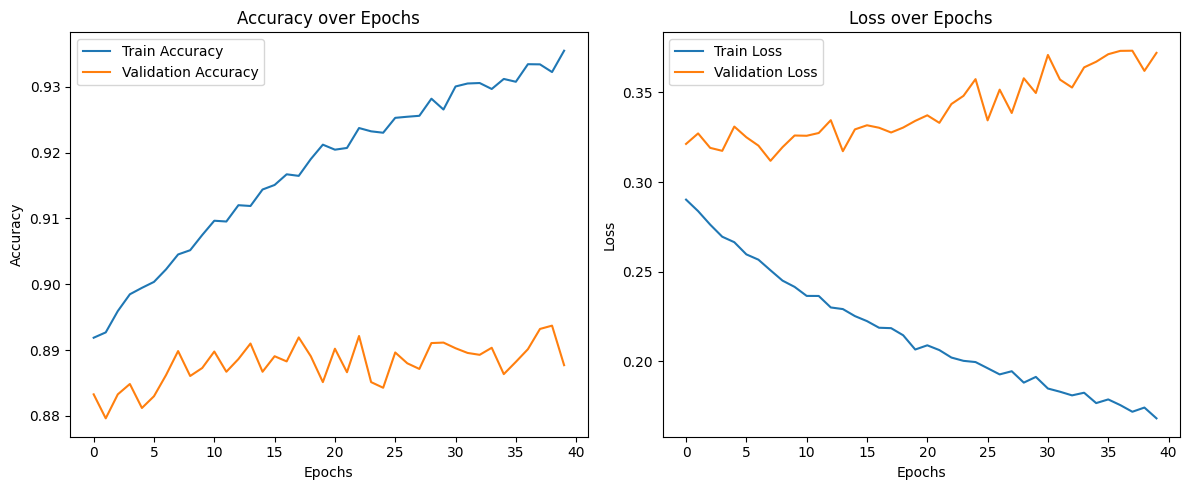

In [253]:
# Tracking 'Accuracy'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Trace the 'loss'
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### Interpretation :

**Accuracy** :
- **Train Accuracy** : it is increasing steadily and tending to a value close to 98%, which shows that the model learns well on training data.
- **Validation Accuracy** : it remains rather stable around 88-90%, but does not show a significant improvement after 5-10 epochs. This could indicate that the model is reaching its saturation point, and increasing the number of epochs beyond this does not improve the performance on validation data.

**Loss** :
- **Train Loss** : the loss decreases steadily, which is expected as the model improves.
- **Validation Loss** : after an initial decrease, the validation loss begins to oscillate and even increase, which is a sign of 'overfitting'.

**Conclusion on the Optimal Number of Epochs**: 
- The increase in validation loss and stabilization of validation accuracy after 5-10 epochs indicate that continuing training beyond this point will not be very beneficial.
- Based on these graphs, it would appear that the optimal number of epochs is around 10-15 epochs. Beyond that, you start to see signs of overfitting, where the model performs better on training data but less well on validation data.

We could also change our Regularization method ('**Dropout**'), and using a technique like "**Early Stopping**" to stop the training automatically when the performance on the validation game stops improving. Here’s how we could implement this:

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping with 5 epochs, and restoration of the best weights
early_stopping = EarlyStopping(monitor='val_loss',          # specifies the metric we will monitor during training : here, it is "validation loss"
                               patience=5,                  # training will stop if our metric ('val_loss') does not improve for a certain number of epochs : here, this number is 5
                               restore_best_weights=True)   # ensures that the model's weights are restored to the best state (the state where the 'val_loss' was lowest) once training stops

# Example of a Model training with 40 epochs and batch size of 32
history = model.fit(
    train_images, train_labels, 
    epochs=40, 
    batch_size=32,  # Batch Size
    validation_data=(test_images, test_labels), 
    callbacks=[early_stopping]
)

Epoch 1/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.9339 - loss: 0.1734 - val_accuracy: 0.8911 - val_loss: 0.3863
Epoch 2/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - accuracy: 0.9380 - loss: 0.1645 - val_accuracy: 0.8883 - val_loss: 0.3867
Epoch 3/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.9365 - loss: 0.1647 - val_accuracy: 0.8899 - val_loss: 0.3836
Epoch 4/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.9381 - loss: 0.1625 - val_accuracy: 0.8873 - val_loss: 0.3917
Epoch 5/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - accuracy: 0.9368 - loss: 0.1620 - val_accuracy: 0.8905 - val_loss: 0.3933
Epoch 6/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.9378 - loss: 0.1580 - val_accuracy: 0.8891 - val_loss: 0.4120
Epoch 7/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - accuracy: 0.9406 - loss: 0.1584 - val_accuracy: 0.8888 - val_loss: 0.3925
Epoch 8/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.9406 -

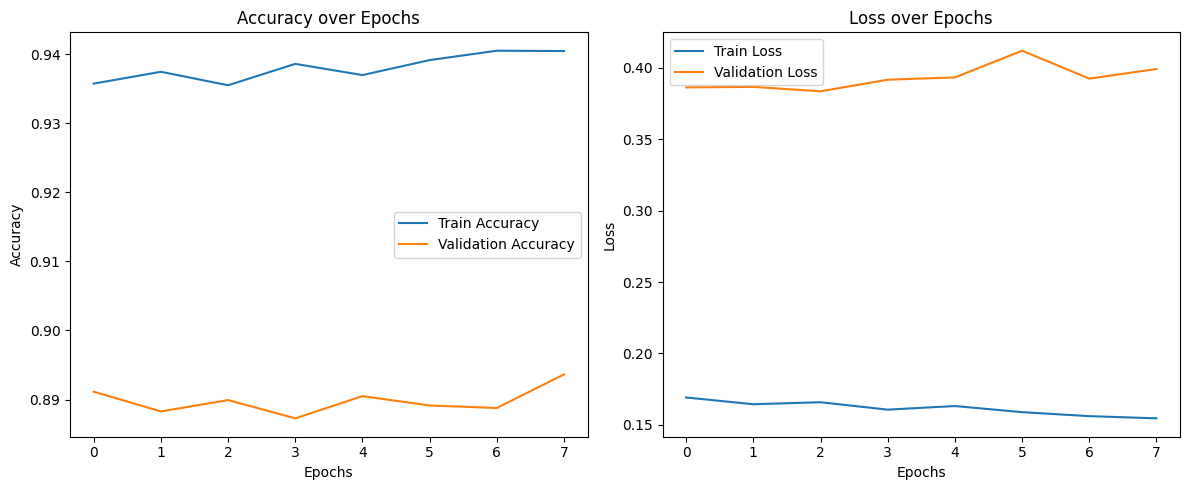

In [55]:
# Plot the accuracy and loss curves for training and validation
plt.figure(figsize=(12, 5))

# Trace the accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Trace the loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Interpretations :

**Accuracy** : You should see the accuracy increase on the training data, and eventually stabilize or decrease on the validation data if the model starts overlearning.

**Loss** : The loss of training is continuously decreasing, while the loss of validation stabilizes or begins to increase when the model reaches its learning limits.

The purpose of these curves is to see where the loss validation starts to stabilize or increase, suggesting that the model does not improve anymore. Early Stopping will stop training at this point, and with the 'restore_best_weights=True' parameter, the best weights from training will be restored.

Hence, we can use these curves to determine how many epochs are actually needed before the model starts overlearning.

### Evaluate Accuracy
We compare how the model performs on the test dataset.

In [254]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

438/438 - 0s - 700us/step - accuracy: 0.8877 - loss: 0.3720

Test accuracy: 0.8877142667770386


It turns out that the accuracy on the test dataset is a **little less** than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents **overfitting**. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

## Make Predictions

    An activation function is a mathematical function applied to the output of a neuron in a network of neurons. It determines whether the neuron should be activated or not by introducing non-linearity into the model. Activation functions play a crucial role in model learning by allowing complex relationships to be modelled.

| Activation Function   | Description   | Usage   | Benefits   | Disadvantages   |
|-------------------------|-----------------------------------------------------------------------------|--------------------------------------------|---------------------------------------------|--------------------------------------------|
| **ReLU** (Rectified Linear Unit) | Returns 0 for negative entries and input value for positive ones. | Hidden layer of neural networks.  | Simple and fast, reduces the risk of vanishing gradient. | Can cause "dead neurons".   |
| **Leaky ReLU**   | Variant of ReLU that allows for a small slope for negative values.  | Hidden layer.   | Solves the problem of "dead neurons".   | Not always performing in all contexts. |
| **Sigmoid**   | Returns a value between 0 and 1, often used for binary outputs. | Output layer for binary classification. | Interpretable as a probability.   | Risk of vanishing gradient, not centered. |
| **Tanh** (Hyperbolic Tangent) | Returns a value between -1 and 1.   | Hidden layer.   | Centered around 0, improves convergence. | Risk of vanishing gradient.   |
| **Softmax**   | Transforms logits into probabilities on classes, used in output. | Output layer for multi-class classification. | Provides normalized probabilities.   | Sensitive to extreme (outliers) values. |
| **ELU** (Exponential Linear Unit) | Returns a negative value for negative inputs and follows an exponential curve. | Hidden layer.   | Helps avoid "dead neurons".   | More expensive in calculation compared to ReLU. |
| **Swish**   | Input value and sigmoid function product.   | Hidden layer.   | Performance improved in some cases. | More complex to calculate than ReLU.   |
| **GELU** (Gaussian Error Linear Unit) | Function that combines ReLU and Gaussian curve.   | Advanced neural networks.   | Promising performance for modern models. | Less known, may require testing.   |


Before, we used '**ReLU**' as our activation function, but '**Softmax**' seems to be ideal for this type of problem because it produces a distribution of probabilities on the 10 classes.

With the model trained, we can use it to make predictions about some images. We attach a softmax layer to convert the model's linear outputs (logits) to probabilities, which should be easier to interpret.

In [255]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
# Make predictions on test images
predictions = probability_model.predict(test_images)

print("Predicted probabilities for the first image :", predictions[0]) 
# Return an array of 10 numbers : they represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing.

predicted_label = np.argmax(predictions[0]) # return the label with the highest confidence value
print("Predicted class for first image :", predicted_label)

real_label = test_labels[0] # return the real label
print("Actual class of the first image :", real_label)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step
Predicted probabilities for the first image : [8.9812429e-06 9.8660427e-01 8.1915492e-14 1.3384395e-02 6.9967108e-09
 4.1524816e-20 2.3422228e-06 3.7451433e-23 2.6988292e-10 1.2193491e-15]
Predicted class for first image : 1
Actual class of the first image : 1


### Visualization of Predictions

We are visualizing some predictions to better understand the model.

In [256]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [257]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

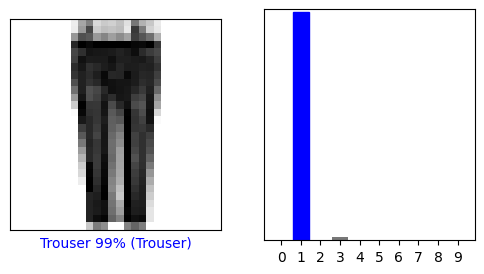

In [258]:
# Verify predictions for the 0th image
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

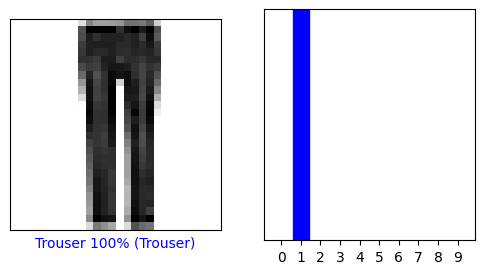

In [259]:
# Verify predictions for the 12th image
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

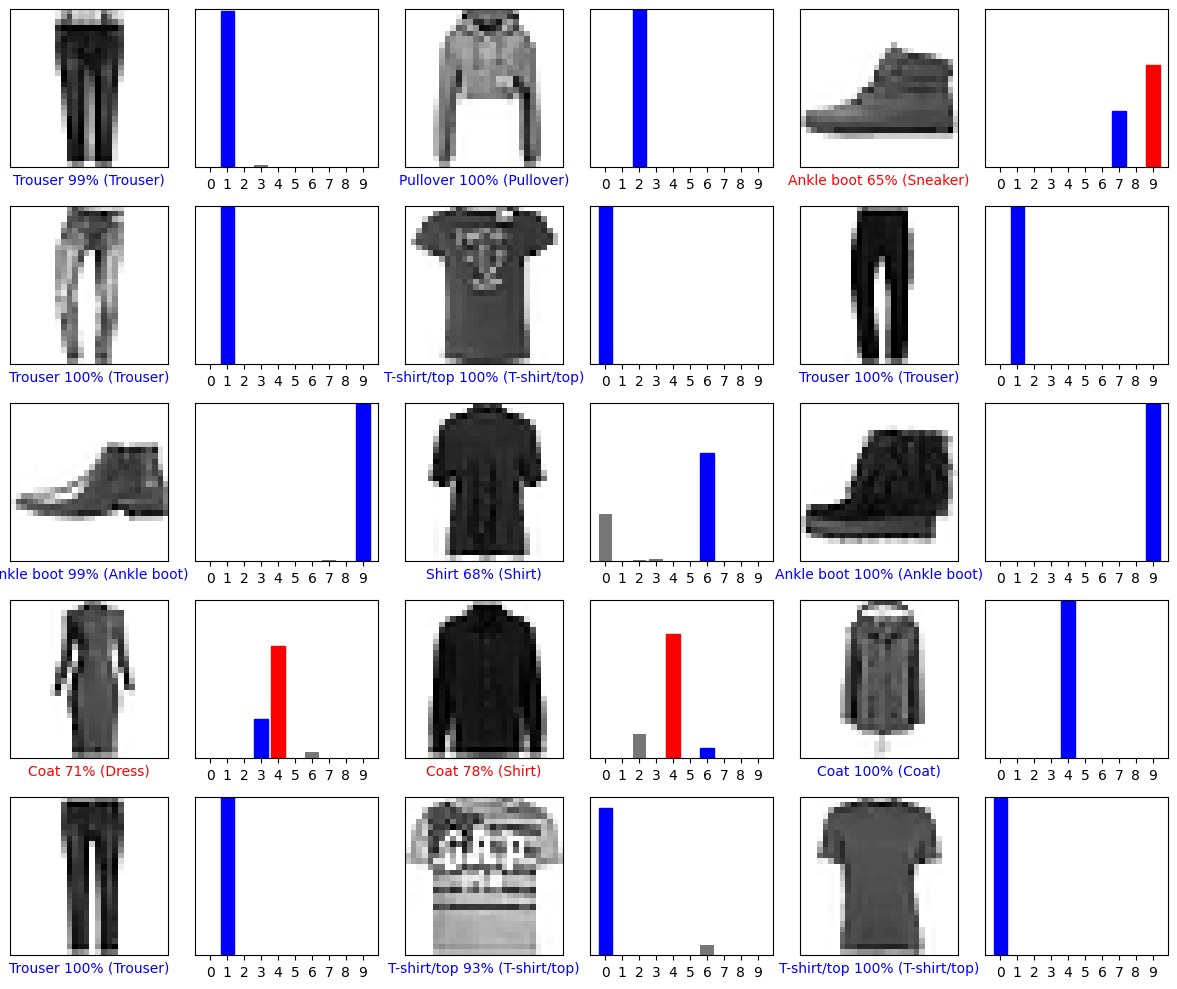

In [260]:
# Plot of several images with their predictions (the model can be wrong even when very confident).
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

We will then use the trained model to make a prediction about a single image.

Image Shape (28, 28)
Selected Shape Image Batch: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Prediction for Selected Picture: [[2.2515723e-09 9.6099704e-08 9.9915469e-01 1.2678205e-13 8.4361457e-04
  4.9095008e-23 1.5848176e-06 2.9332469e-34 3.5018947e-16 1.2437727e-21]]
Class Predicted Number: 2


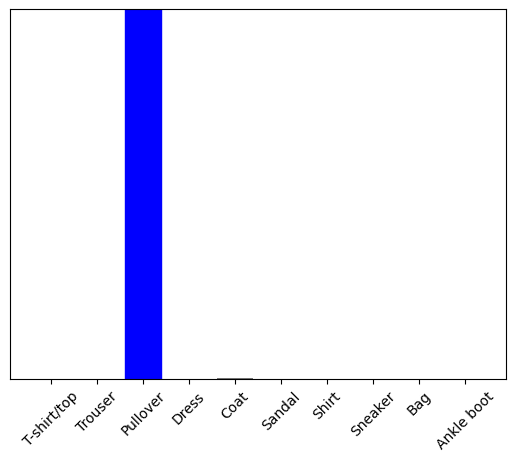

In [63]:
# Grab an image from the test dataset.
img = test_images[1]
print("Image Shape", img.shape) # 28x28 pixels

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))
print("Selected Shape Image Batch:", img.shape)

# Predict the correct label for this image 
predictions_single = probability_model.predict(img)
print("Prediction for Selected Picture:", predictions_single)

# Plot the results
print("Class Predicted Number:", np.argmax(predictions_single[0]))
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()